In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import colorama
from colorama import Fore

In [48]:
## loading the data from csv file to a Pandas DataFrame
dataset = pd.read_csv('dataset.csv')

In [49]:
## first 5 rows of the dataframe
dataset.head()

,age,gender,bmi,children,smoker,state,charges
0,19,female,27.900,0,yes,telangana,168840.9240
1,18,male,33.770,1,no,andhrapradesh,17250.5523
2,28,male,33.000,3,no,andhrapradesh,44490.4620
3,33,male,22.705,0,no,tamilnadu,219840.4706
4,32,male,28.880,0,no,tamilnadu,38660.8552


In [50]:
## number of rows and columns
dataset.shape

(1339, 7)

In [51]:
## getting some informations about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1339 non-null   int64  
 1   gender    1339 non-null   object 
 2   bmi       1339 non-null   float64
 3   children  1339 non-null   int64  
 4   smoker    1339 non-null   object 
 5   state     1339 non-null   object 
 6   charges   1339 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.4+ KB


In [52]:
## check the unique values in catagorical columns(object Dtype)
print(dataset["gender"].unique())
print(dataset["smoker"].unique())
print(dataset["state"].unique())

['female' 'male']
['yes' 'no']
['telangana' 'andhrapradesh' 'tamilnadu' 'karnataka']


In [53]:
## checking for missing values
dataset.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
state       0
charges     0
dtype: int64

## Data Analisys

In [54]:
## statistical Measures of the dataset
dataset.describe()

,age,bmi,children,charges
count,1339.000000,1339.000000,1339.000000,1339.000000
mean,39.194922,30.658047,1.094100,132518.813628
std,14.051691,6.099050,1.205414,120916.854811
min,18.000000,15.960000,0.000000,11210.873900
25%,26.500000,26.255000,0.000000,47285.502375
50%,39.000000,30.400000,1.000000,93770.904700
75%,51.000000,34.687500,2.000000,166215.607600
max,64.000000,53.130000,5.000000,637700.428000


<Figure size 600x600 with 0 Axes>

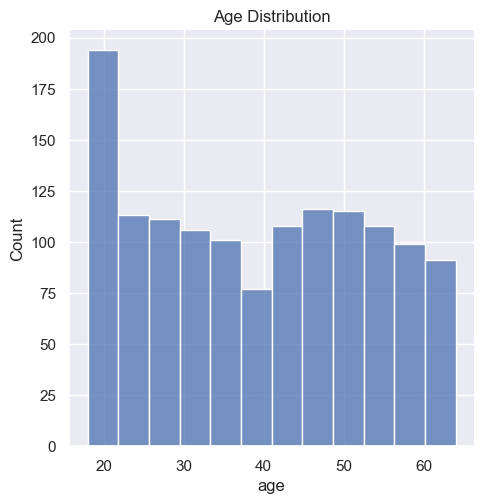

In [55]:
## distribution of age value
sns.set()
plt.figure(figsize = (6,6))
sns.displot(dataset['age'])
plt.title('Age Distribution')
plt.show()

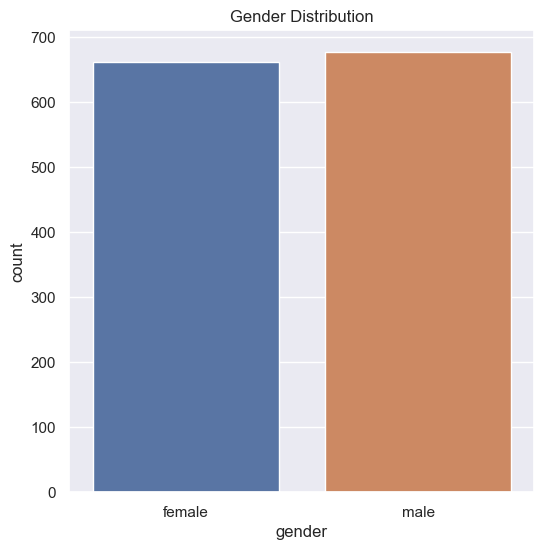

male      677
female    662
Name: gender, dtype: int64

In [56]:
## Gender column
plt.figure(figsize = (6,6))
sns.countplot(x = 'gender', data = dataset)
plt.title('Gender Distribution')
plt.show()
dataset['gender'].value_counts()

<Figure size 600x600 with 0 Axes>

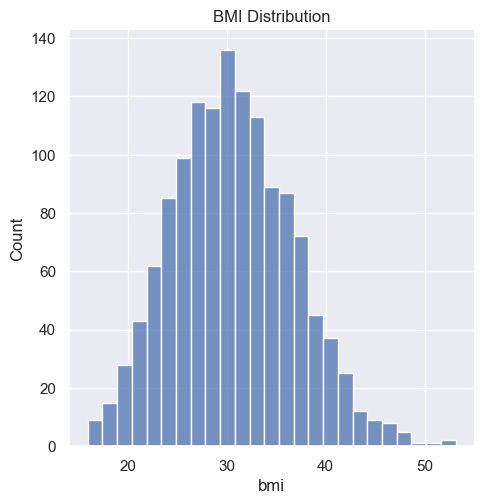

In [57]:
## bmi distribution
plt.figure(figsize = (6,6))
sns.displot(dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

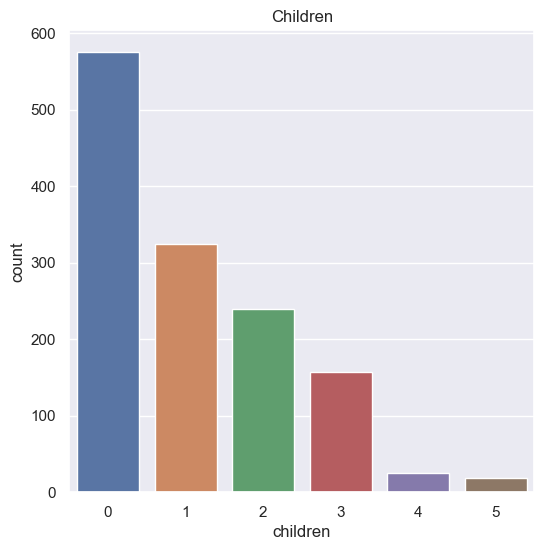

In [58]:
## children column
plt.figure(figsize=(6,6))
sns.countplot(x = 'children', data = dataset)
plt.title('Children')
plt.show()

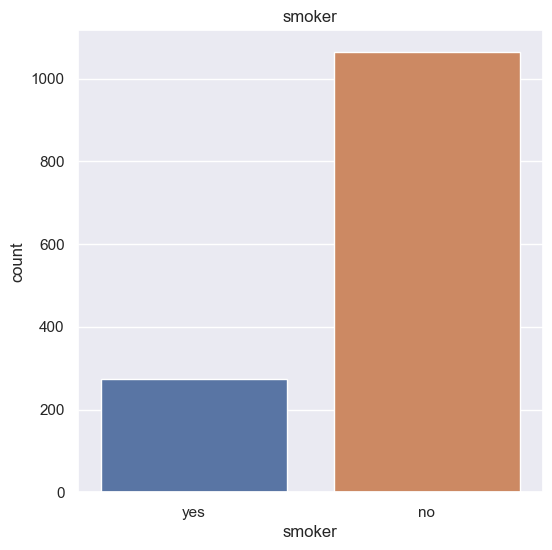

In [59]:
## smoker column
plt.figure(figsize=(6,6))
sns.countplot(x = 'smoker', data = dataset)
plt.title('smoker')
plt.show()

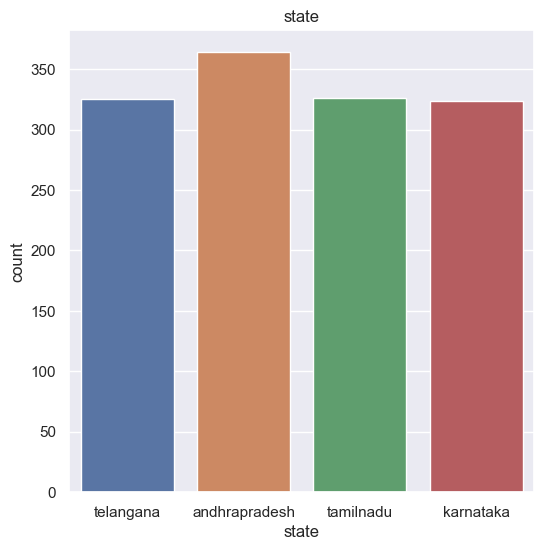

In [60]:
# state column
plt.figure(figsize = (6,6))
sns.countplot(x='state', data = dataset)
plt.title('state')
plt.show()

<Figure size 600x600 with 0 Axes>

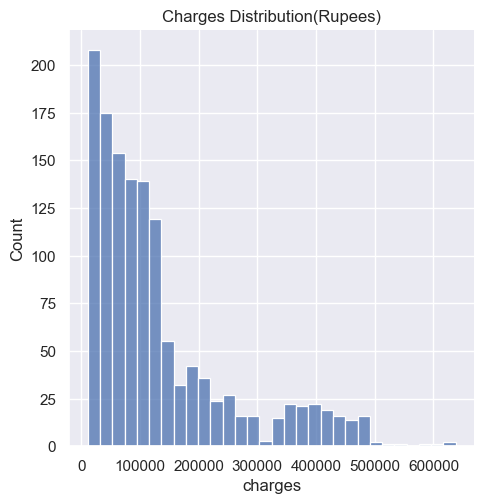

In [61]:
## distribution of charges value
plt.figure(figsize = (6,6))
sns.displot(dataset['charges'])
plt.title('Charges Distribution(Rupees)')
plt.show()

## Data Pre-Processing

#### Encoding the categorical features
    1. Gender
    2. Smoker
    3. State

In [62]:
dataset.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'state', 'charges'], dtype='object')

In [63]:
final_dataset = dataset[['charges', 'age', 'gender', 'bmi', 'children', 'smoker', 'state']]
final_dataset.head()

,charges,age,gender,bmi,children,smoker,state
0,168840.9240,19,female,27.900,0,yes,telangana
1,17250.5523,18,male,33.770,1,no,andhrapradesh
2,44490.4620,28,male,33.000,3,no,andhrapradesh
3,219840.4706,33,male,22.705,0,no,tamilnadu
4,38660.8552,32,male,28.880,0,no,tamilnadu


In [64]:
final_dataset = pd.get_dummies(final_dataset, drop_first = True)
final_dataset.head()

,charges,age,bmi,children,gender_male,smoker_yes,state_karnataka,state_tamilnadu,state_telangana
0,168840.9240,19,27.900,0,0,1,0,0,1
1,17250.5523,18,33.770,1,1,0,0,0,0
2,44490.4620,28,33.000,3,1,0,0,0,0
3,219840.4706,33,22.705,0,1,0,0,1,0
4,38660.8552,32,28.880,0,1,0,0,1,0


In [65]:
final_dataset.corr()

,charges,age,bmi,children,gender_male,smoker_yes,state_karnataka,state_tamilnadu,state_telangana
charges,1.000000,0.299701,0.195704,0.065842,0.055857,0.784064,0.007202,-0.037528,-0.047427
age,0.299701,1.000000,0.110173,0.043217,-0.021690,-0.026665,0.002960,-0.001926,0.010498
bmi,0.195704,0.110173,1.000000,0.013545,0.045463,0.002017,-0.137573,-0.137314,-0.005704
children,0.065842,0.043217,0.013545,1.000000,0.016480,0.006325,-0.022414,0.023573,0.022288
gender_male,0.055857,-0.021690,0.045463,0.016480,1.000000,0.077501,-0.002842,-0.009836,-0.004600
smoker_yes,0.784064,-0.026665,0.002017,0.006325,0.077501,1.000000,0.001976,-0.034258,-0.037720
state_karnataka,0.007202,0.002960,-0.137573,-0.022414,-0.002842,0.001976,1.000000,-0.320511,-0.319862
state_tamilnadu,-0.037528,-0.001926,-0.137314,0.023573,-0.009836,-0.034258,-0.320511,1.000000,-0.321164
state_telangana,-0.047427,0.010498,-0.005704,0.022288,-0.004600,-0.037720,-0.319862,-0.321164,1.000000


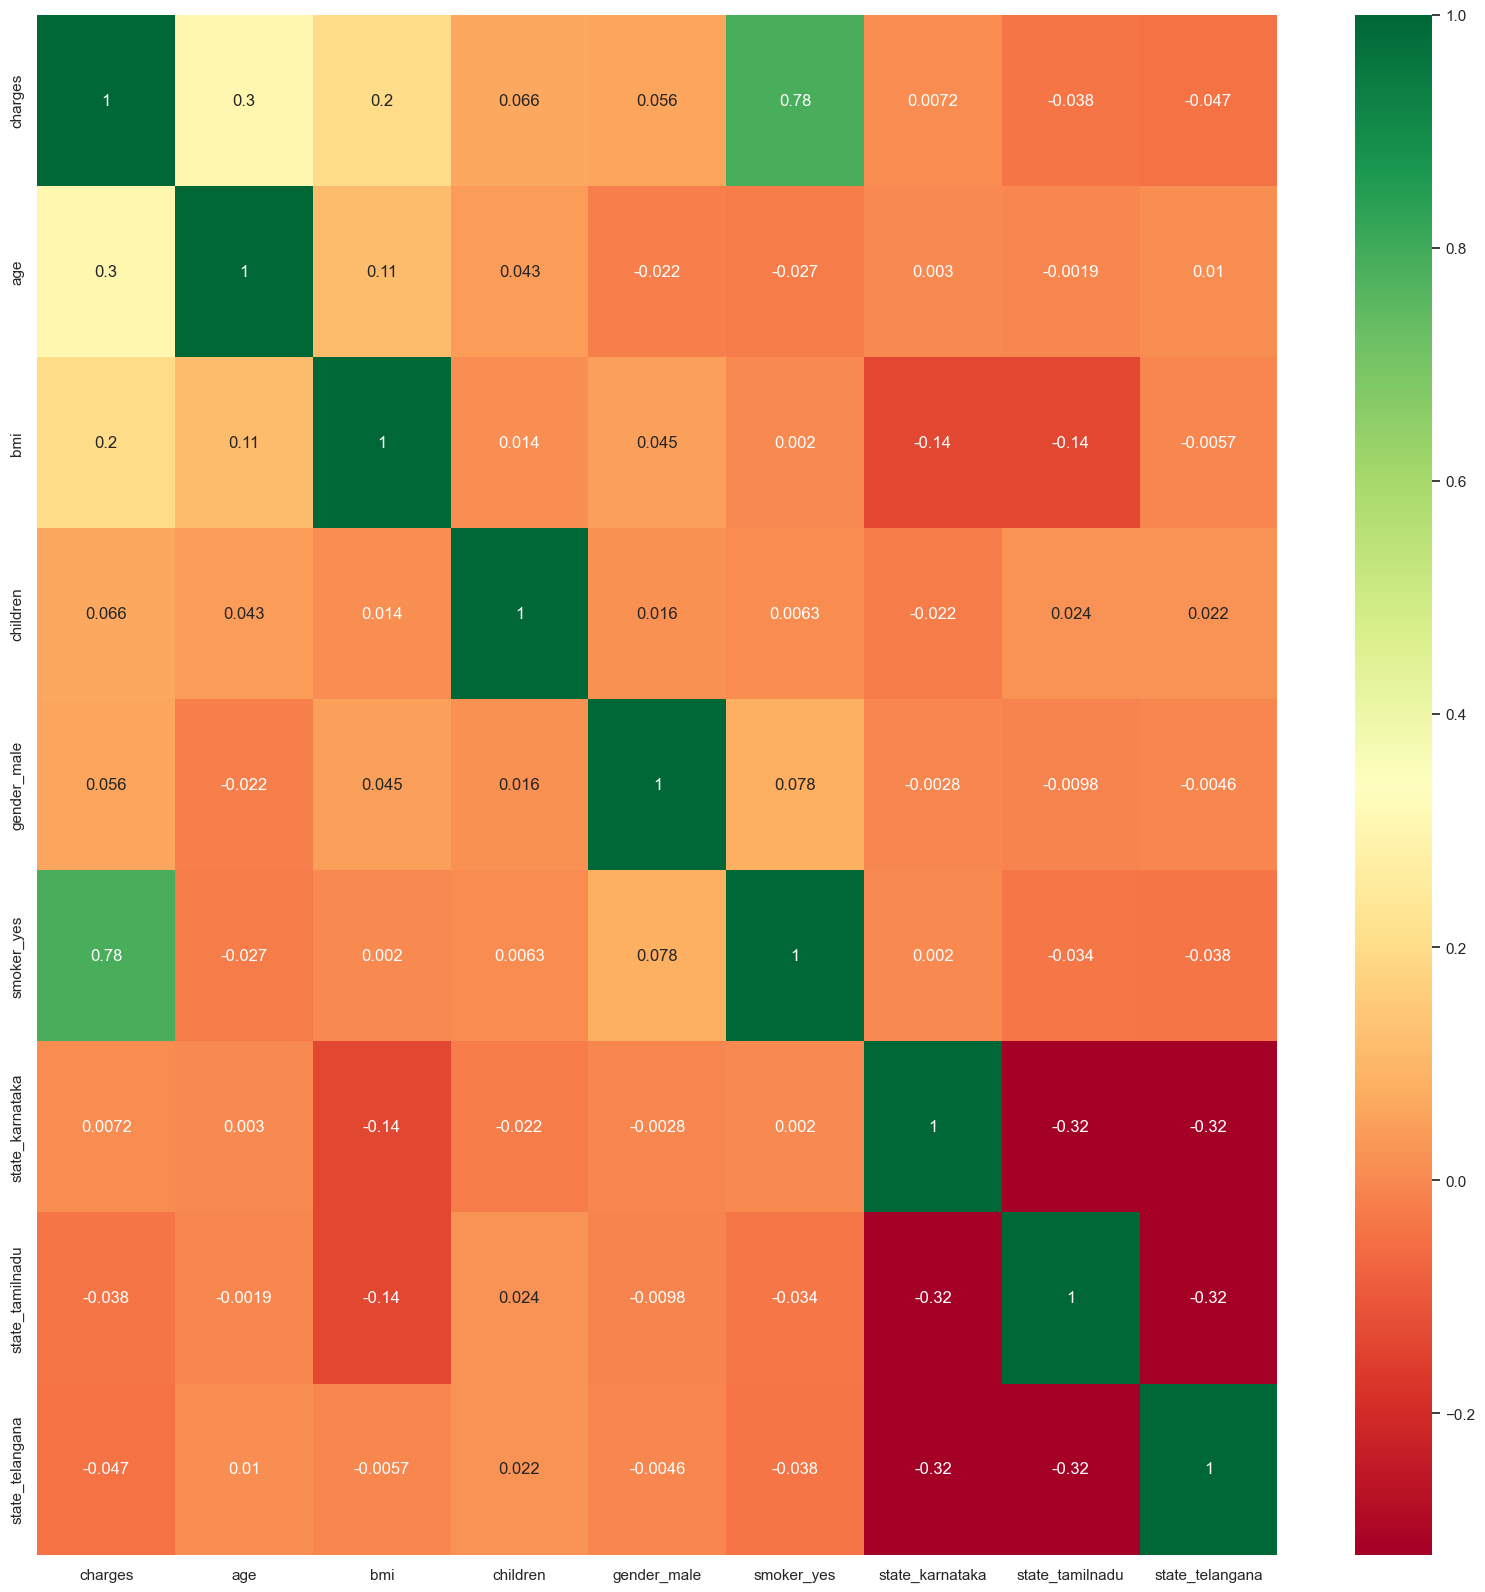

In [66]:
%matplotlib inline
corrmat=final_dataset.corr()
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) 
#plot heat map 
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Splitting the Features and Target

In [67]:
## independent and dependent features

X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [68]:
X.head()

,age,bmi,children,gender_male,smoker_yes,state_karnataka,state_tamilnadu,state_telangana
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,0,0
2,28,33.000,3,1,0,0,0,0
3,33,22.705,0,1,0,0,1,0
4,32,28.880,0,1,0,0,1,0


In [69]:
y.head()

0    168840.9240
1     17250.5523
2     44490.4620
3    219840.4706
4     38660.8552
Name: charges, dtype: float64

#### Splitting the data into Training data & Testing Data

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [71]:
print(X.shape, X_train.shape, X_test.shape)

(1339, 8) (1071, 8) (268, 8)


## Model Training

#### Linear Regression

In [72]:
## loading the Linear Regression model
regressor = LinearRegression()

In [73]:
regressor.fit(X_train.values, y_train)

LinearRegression()

## Model Evaluation

In [74]:
## prediction on training data
training_data_prediction = regressor.predict(X_train.values)

In [75]:
## R squared value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared value : ', r2_train)

R squared value :  0.7467932609498291


In [76]:
## prediction on test data
test_data_prediction = regressor.predict(X_test.values)

In [77]:
## R squared value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.7371139912102231


## Building a Predictive System

In [78]:
## age  	bmi 	children	gender_male 	smoker_yes  	state_karnataka 	state_tamilnadu 	state_telangana

age = int(input("enter the age: "))
gender = input("enter the gender: male/female ")
bmi = float(input("enter the bmi: "))
children = int(input("enter how many children: "))
smoker = input("is Smoker yes/no ")
state = input("enter the state: ")

if gender == "male":
    int_gender = 1
elif gender == "female":
    int_gender = 0
    
if smoker == "yes":
    int_smoker = 1
elif smoker == "no":
    int_smoker = 0

if state == "andhrapradesh":
    int_karnataka = 0
    int_tamilnadu = 0
    int_telangana = 0
elif state == "telangana":
    int_karnataka = 0
    int_tamilnadu = 0
    int_telangana = 1
elif state == "karnataka":
    int_karnataka = 1
    int_tamilnadu = 0
    int_telangana = 0
elif state == "tamilnadu":
    int_karnataka = 0
    int_tamilnadu = 1
    int_telangana = 0

input_data = (age,bmi,children,int_gender,int_smoker,int_karnataka,int_tamilnadu,int_telangana)

## changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

## reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)


print(Fore.RED +'The medical cost is Rs.', prediction[0])

enter the age: 25
enter the gender: male/female male
enter the bmi: 35.4415
enter how many children: 2
is Smoker yes/no no
enter the state: telangana
The medical cost is Rs. 65643.16028322236
